!pip install tsfresh

!pip install statsmodels==0.12.1

# Quick Start

In [10]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures
from tsfresh.examples.robot_execution_failures import load_robot_execution_failures

download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [11]:
print(timeseries.head())

   id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0


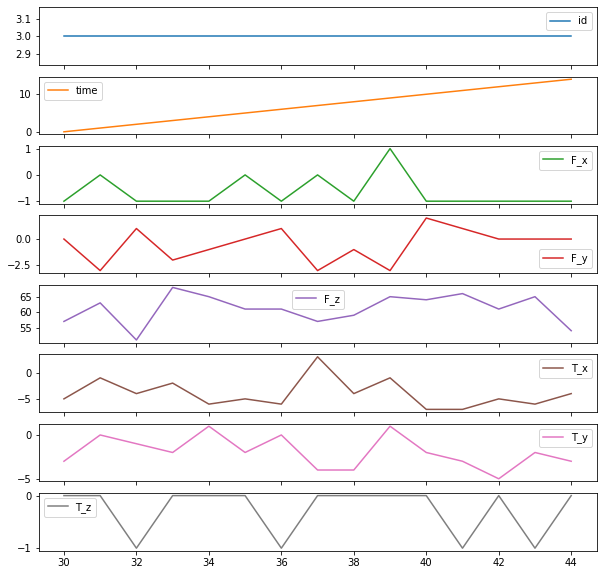

In [12]:
import matplotlib.pyplot as plt

timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

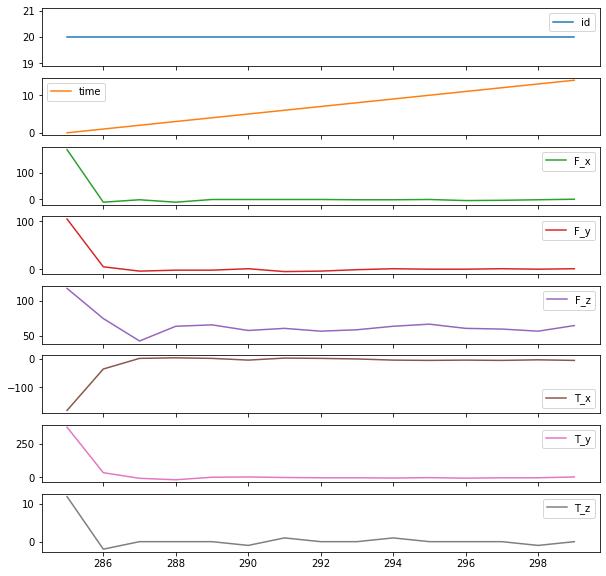

In [13]:
timeseries[timeseries['id'] == 20].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [14]:
from tsfresh import extract_features

extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.48it/s]


In [22]:
extracted_features.dropna(axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 88
Columns: 4674 entries, T_x__variance_larger_than_standard_deviation to F_z__permutation_entropy__dimension_7__tau_1
dtypes: float64(4674)
memory usage: 3.1 MB


In [15]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

C:\Users\Stepan\anaconda3\lib\site-packages\tsfresh\utilities\dataframe_functions.py:171: RuntimeWarning: The columns ['T_x__partial_autocorrelation__lag_7'
 'T_x__partial_autocorrelation__lag_8'
 'T_x__partial_autocorrelation__lag_9' ...
 'F_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"min"'
 'F_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'F_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(


In [24]:
features_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 88
Columns: 671 entries, F_x__value_count__value_-1 to F_y__quantile__q_0.7
dtypes: float64(671)
memory usage: 462.0 KB


In [27]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y, column_id='id', column_sort='time')

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.67it/s]


In [28]:
features_filtered_direct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 88
Columns: 671 entries, F_x__value_count__value_-1 to F_y__quantile__q_0.7
dtypes: float64(671)
memory usage: 462.0 KB


In [34]:
features_filtered_direct['F_x__fft_coefficient__attr_"abs"__coeff_1']

1       1.000000
2       0.624118
3       2.203858
4       0.844394
5       2.730599
         ...    
84    359.248162
85     36.770027
86    312.044052
87    481.046930
88     15.524355
Name: F_x__fft_coefficient__attr_"abs"__coeff_1, Length: 88, dtype: float64

In [33]:
features_filtered_direct.columns.values

array(['F_x__value_count__value_-1', 'F_x__abs_energy',
       'F_x__range_count__max_1__min_-1', 'F_y__abs_energy',
       'T_y__variance', 'T_y__standard_deviation',
       'F_x__fft_coefficient__attr_"abs"__coeff_1',
       'T_y__fft_coefficient__attr_"abs"__coeff_1', 'T_y__abs_energy',
       'F_z__standard_deviation', 'F_z__variance',
       'F_z__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"var"',
       'F_x__variance', 'F_x__standard_deviation',
       'F_x__ratio_value_number_to_time_series_length', 'T_x__variance',
       'T_x__standard_deviation',
       'T_x__fft_coefficient__attr_"abs"__coeff_1',
       'T_y__fft_coefficient__attr_"abs"__coeff_2',
       'F_x__cid_ce__normalize_True',
       'F_x__partial_autocorrelation__lag_1',
       'F_x__autocorrelation__lag_1',
       'T_y__percentage_of_reoccurring_datapoints_to_all_datapoints',
       'T_y__fft_coefficient__attr_"abs"__coeff_4',
       'T_x__ratio_value_number_to_time_series_length',
       'F_x__lempel

# In datasets

## GHL

In [37]:
from utils.datasets import GhlKasperskyDataset

In [51]:
import tsfresh

In [38]:
ds = GhlKasperskyDataset()
ds.shake_not_stir()

In [48]:
train, faults, _ = next(ds.train_generator())

In [54]:
tsfresh.feature_extraction.feature_calculators.cid_ce(train['input_temp_gc'], normalize=True)

4.9157095